In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import combinations
from collections import Counter
import math
from functools import partial
from tqdm import tqdm
from p_tqdm import p_map, p_umap, p_imap, p_uimap
from multiprocessing.pool import ThreadPool as Pool
from multiprocessing import Process

plt.style.use('ggplot')

In [2]:
# This function implements the KNN classifier
# This function computes the euclidean distance between data points
# def euclidean_distance(x_s,y_s):
#     # Iterates each element from both arrays, take its difference and power 2 before square root
#     return np.sqrt(np.sum((x_s-y_s)**2))

# This function implements the Knn classifier
def knn(k, predicted_x, predicted_y, pool):
    # distances = [euclidean_distance(np.array([predicted_dp[0], predicted_dp[1]]),np.array([x, y])) for x, y, class_id in pool]
   
    # We have to refactor this: So that it uses dot product of vectors to find euclidean distance
    # We have to refactor 3 functions: knn(), disagreement_func(), enumeration() - make sure it utilizes numpy arrays instead of loops.
    predicted_dp = np.array([predicted_x, predicted_y, 0.0])
    # predicted_dp = np.append(np.array(predicted_dp), np.array([0.0]) )
    distances = predicted_dp - pool
    distances = np.power(distances, 2)
    distances = distances[:,0:2] 
    distances = np.sum(distances, axis=1)
    distances = np.sqrt(distances)
    
    vote_pool_indices = np.argsort(distances)[:k]
    vote_pool_classes = [pool[i][2] for i in vote_pool_indices]
    vote_result = Counter(vote_pool_classes).most_common()
    
    return vote_result[0][0]


In [3]:
# # Array broadcasting
# rowMatrix = np.array([1, 29, 30])
# columnMatrix = np.array([[1, 2, 5], [2, 7, 4], [3, 5, 2]])

# print('#########')
# print(columnMatrix[:, 0:2])

# print('#########')
# r = rowMatrix -  columnMatrix
# print(r)


# print('#########')
# r1 = np.sum(r, axis=1)
# print(r1)



# Read dataset

In [4]:
df = pd.read_csv('hw5data.txt', sep= ' ', names= ['x','y', 'class'])
df

x         y  class
0    0.776233  0.052780      1
1    0.992234  0.087356      1
2    0.263741  0.131315      1
3    0.079478  0.109225      1
4    0.688997  0.983182      1
..        ...       ...    ...
802  0.932700  0.875138      0
803  0.541090  0.555108      0
804  0.988755  0.194709      0
805  0.263414  0.974600      0
806  0.733660  0.835736      0

[807 rows x 3 columns]

<Axes: ylabel='Frequency'>

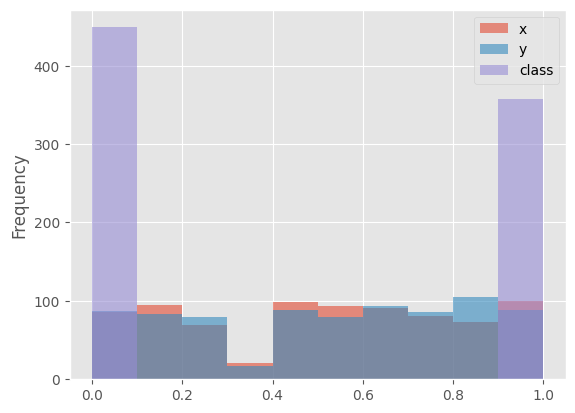

In [5]:
df.plot(kind= 'hist', alpha=0.6)

<Axes: xlabel='x', ylabel='y'>

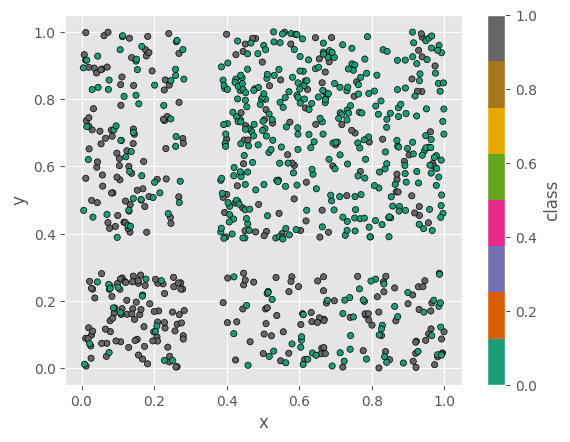

In [6]:
df.plot(x= 'x', y = 'y', c='class', kind= 'scatter', colormap= 'Dark2', edgecolor='k')

In [7]:
# Create a dense 2D grid of data points 
mesh_X, mesh_Y = np.mgrid[0:1:20j,0:1:20j]

n = 20
K = 1

# Target classifier, g: It has a array P which is the classifier computed using all points in P (hw5data.txt). 
P = df.to_numpy() 
print(f'Dataset of target classifier: {P.shape}')

# Teaching/ student classifier, f: It has a array D which picks elements from P (hw5data.txt) D is a 
# subset or proper set of P, which holds the data points we want to include in teaching.
D = np.array([])
print(f'Dataset of teaching classifier: {D.shape}')

Dataset of target classifier: (807, 3)
Dataset of teaching classifier: (0,)


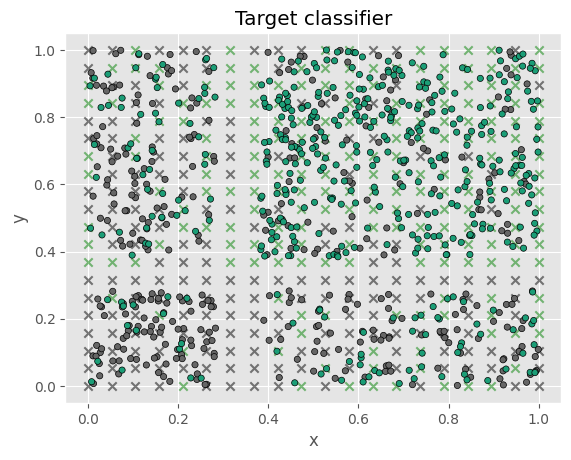

In [8]:
colors = {0: 'green', 1:'black'}
# View decision boundary of target classifier using all data points from the orignal pool
for X, Y in zip(mesh_X, mesh_Y):
    for x, y in zip(X, Y):
        result = knn(K, x,y, P)
        plt.scatter(x,y, c= colors[result],alpha= 0.5, marker='x')
        
temp_P = P.T
plt.scatter(temp_P[0], temp_P[1], c=temp_P[2], edgecolor='k', cmap='Dark2', s=20)
plt.title('Target classifier')
plt.xlabel('x')
plt.ylabel('y')
        
plt.show()

In [9]:
# We than use the dense grid to map it onto both the target classifier and teaching classifier. This generates
# feature vectors (x_{1}, x_{2}, y) with the same dimensions.

# Both feature vectors are fed into the disagreement function, which compares each dense grid points correspondingly
# by comparing their corresponding
# f(x') - computed from teaching classifier, and y' - computed from target classifiers which is defined in the disagreement function.
# Return the result of the unified cost function.

# Use that cost function result to do enumeration and greedy respectively. 

# Map the dense 2D grid to the target classifier, since we will be using it for all comparisons.


In [10]:
%%time
# We precompute and store target classifier to avoid recomputation
target_class_mesh = []
for i in range(len(mesh_X)):
    res = []
    for j in range(len(mesh_X[0])):
        res.append(knn(K, mesh_X[i][j], mesh_Y[i][j], P))
        
    target_class_mesh.append(res)
    
target_class_mesh = np.array(target_class_mesh)
print(f'target mesh:\n {target_class_mesh} ')

target mesh:
 [[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 

In [11]:
%%time
# Enumeration

# This function
def find_combination(n, pool):
    datasets = combinations(pool, n)
    return np.array(list(datasets))

    
def disagreement_func(pool_D):
    disagree_val = 0
    for i in range(len(mesh_X)):
        for j in range(len(mesh_X[0])):
            disagree_val += 0 if knn(K, mesh_X[i][j],mesh_Y[i][j], pool_D) == target_class_mesh[i][j] else 1
            
    return disagree_val/mesh_X.size

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs


In [12]:
# Check if utilities class is imported successfully
import sys
import utilities 

modulename = 'utilities'
if modulename not in sys.modules:
    print('import not successful!')

In [13]:
import multiprocessing
# Check number of cpu cores
print(f'Max number of cores in this machine: {multiprocessing.cpu_count()}')

Max number of cores in this machine: 8


In [14]:
possible_pool_Ds = find_combination(2, P)
util_obj = utilities.Utilities(K, mesh_X, mesh_Y, P, target_class_mesh)

with Pool(processes = multiprocessing.cpu_count()) as p:
    size = len(possible_pool_Ds)
    with tqdm(total= size) as pbar:
        for result in p.imap_unordered(util_obj.disagreement_func_ex, possible_pool_Ds):
            pbar.update()
            # answer returned are stored in result variable as tuples
            
            # TODO:
            # we have tried our last option of using multiprocessing. It appears it does not speed upo combination by much
            # The next step is to check if we really are just computing 325221 iteration
            # Ideas to increase speed: 
            # 
            # Reduce combination: We have to find a way to selectively choose our subset to reduce enumeration set size
            # 
            
p.close()
p.join()

  0%|                                                          | 4/325221 [00:00<5:46:39, 15.64it/s]

(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.688997, 0.983182, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.992234, 0.087356, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.263741, 0.131315, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.117002, 0.434358, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.479548, 0.980424, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.452582, 0.721107, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.178672, 0.928455, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.079478, 0.109225, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.928345, 0.242502, 1.      ]]))


  0%|                                                          | 48/325221 [00:00<38:25, 141.02it/s]

(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.078687, 0.245096, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.680617, 0.404449, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.668501, 0.14594 , 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.246379, 0.430905, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.086344, 0.521489, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.974244, 0.898799, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.18796 , 0.191921, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.027595, 0.099311, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.244765, 0.448887, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.674723, 0.194186, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.576583, 0.963904, 1.      ]]))
(0.5275, array([[0.77

  0%|                                                          | 94/325221 [00:00<28:39, 189.05it/s]

(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.913993, 0.021233, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.667522, 0.823192, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.507216, 0.17667 , 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.133486, 0.404899, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.020939, 0.652276, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.043893, 0.613601, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.283101, 0.171971, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.107878, 0.078982, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.108496, 0.781716, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.17528 , 0.246435, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.758145, 0.851388, 1.      ]]))
(0.5275, array([[0.77

  0%|                                                         | 140/325221 [00:00<25:55, 209.02it/s]

(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.829662, 0.68101 , 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.228721, 0.736212, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.93785 , 0.822443, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.445267, 0.941763, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.50318 , 0.102066, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.278549, 0.235741, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.050663, 0.704754, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.992215, 0.042388, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.011169, 0.916144, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.160466, 0.159847, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.922604, 0.080745, 1.      ]]))
(0.5275, array([[0.77

  0%|                                                         | 192/325221 [00:01<24:02, 225.26it/s]

(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.655251, 0.919636, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.041423, 0.877859, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.498195, 0.910211, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.474305, 0.256393, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.174427, 0.480912, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.650772, 0.259778, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.696729, 0.200931, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.682478, 0.910953, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.930987, 0.454462, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.153479, 0.086369, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.660185, 0.043262, 1.      ]]))
(0.5275, array([[0.77

  0%|                                                         | 240/325221 [00:01<24:15, 223.30it/s]

(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.077223, 0.416167, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.027345, 0.238044, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.086232, 0.149285, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.402103, 0.135882, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.955855, 0.432697, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.130416, 0.600243, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.655649, 0.150262, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.619394, 0.553043, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.744283, 0.707231, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.076566, 0.234999, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.649942, 0.136386, 1.      ]]))
(0.5275, array([[0.77

  0%|                                                         | 293/325221 [00:01<22:57, 235.93it/s]

(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.518107, 0.839958, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.241688, 0.841735, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.936306, 0.994206, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.210011, 0.253186, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.012608, 0.006994, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.57715 , 0.258221, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.275445, 0.135065, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.819092, 0.167359, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.971295, 0.600564, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.237683, 0.063062, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.124776, 0.202227, 1.      ]]))
(0.5275, array([[0.77

  0%|                                                         | 342/325221 [00:01<22:47, 237.66it/s]

(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.196382, 0.081731, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.181885, 0.013497, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.018181, 0.08854 , 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.266593, 0.253929, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.082011, 0.708005, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.390202, 0.508257, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.918068, 0.461773, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.208525, 0.561745, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.666967, 0.272253, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.425333, 0.932323, 1.      ]]))
(0.5275, array([[0.776233, 0.05278 , 1.      ],
       [0.45056 , 0.409233, 1.      ]]))
(0.5275, array([[0.77

  0%|                                                         | 392/325221 [00:01<22:48, 237.31it/s]

(0.3725, array([[0.776233, 0.05278 , 1.      ],
       [0.430082, 0.97275 , 0.      ]]))
(0.345, array([[0.776233, 0.05278 , 1.      ],
       [0.696642, 0.923914, 0.      ]]))
(0.3275, array([[0.776233, 0.05278 , 1.      ],
       [0.652686, 0.806369, 0.      ]]))
(0.5175, array([[0.776233, 0.05278 , 1.      ],
       [0.835272, 0.034814, 0.      ]]))
(0.2975, array([[0.776233, 0.05278 , 1.      ],
       [0.996007, 0.460991, 0.      ]]))
(0.6425, array([[0.776233, 0.05278 , 1.      ],
       [0.610534, 0.011825, 0.      ]]))
(0.5625, array([[0.776233, 0.05278 , 1.      ],
       [0.606118, 0.083636, 0.      ]]))
(0.3075, array([[0.776233, 0.05278 , 1.      ],
       [0.891726, 0.579013, 0.      ]]))
(0.3075, array([[0.776233, 0.05278 , 1.      ],
       [0.942646, 0.415115, 0.      ]]))
(0.325, array([[0.776233, 0.05278 , 1.      ],
       [0.892037, 0.916034, 0.      ]]))
(0.4525, array([[0.776233, 0.05278 , 1.      ],
       [0.535382, 0.387494, 0.      ]]))
(0.345, array([[0.77623

  0%|                                                         | 443/325221 [00:02<22:39, 238.87it/s]

(0.4325, array([[0.776233, 0.05278 , 1.      ],
       [0.420479, 0.596881, 0.      ]]))
(0.2925, array([[0.776233, 0.05278 , 1.      ],
       [0.977662, 0.543481, 0.      ]]))
(0.34, array([[0.776233, 0.05278 , 1.      ],
       [0.787962, 0.985663, 0.      ]]))
(0.565, array([[0.776233, 0.05278 , 1.      ],
       [0.006028, 0.469435, 0.      ]]))
(0.3375, array([[0.776233, 0.05278 , 1.      ],
       [0.613471, 0.839777, 0.      ]]))
(0.3275, array([[0.776233, 0.05278 , 1.      ],
       [0.626921, 0.769371, 0.      ]]))
(0.32, array([[0.776233, 0.05278 , 1.      ],
       [0.825208, 0.794784, 0.      ]]))
(0.3375, array([[0.776233, 0.05278 , 1.      ],
       [0.64473 , 0.89047 , 0.      ]]))
(0.4375, array([[0.776233, 0.05278 , 1.      ],
       [0.166213, 0.95663 , 0.      ]]))
(0.3125, array([[0.776233, 0.05278 , 1.      ],
       [0.765308, 0.761262, 0.      ]]))
(0.3075, array([[0.776233, 0.05278 , 1.      ],
       [0.853432, 0.509788, 0.      ]]))
(0.3625, array([[0.776233,

  0%|                                                         | 518/325221 [00:02<22:59, 235.46it/s]

(0.3525, array([[0.776233, 0.05278 , 1.      ],
       [0.957226, 0.981399, 0.      ]]))
(0.4025, array([[0.776233, 0.05278 , 1.      ],
       [0.779447, 0.199179, 0.      ]]))
(0.605, array([[0.776233, 0.05278 , 1.      ],
       [0.419498, 0.103158, 0.      ]]))
(0.35, array([[0.776233, 0.05278 , 1.      ],
       [0.912198, 0.999075, 0.      ]]))
(0.3525, array([[0.776233, 0.05278 , 1.      ],
       [0.510887, 0.861793, 0.      ]]))
(0.5325, array([[0.776233, 0.05278 , 1.      ],
       [0.840959, 0.018093, 0.      ]]))
(0.3725, array([[0.776233, 0.05278 , 1.      ],
       [0.527072, 0.677976, 0.      ]]))
(0.3475, array([[0.776233, 0.05278 , 1.      ],
       [0.666485, 0.966599, 0.      ]]))
(0.2925, array([[0.776233, 0.05278 , 1.      ],
       [0.957813, 0.657249, 0.      ]]))
(0.545, array([[0.776233, 0.05278 , 1.      ],
       [0.128354, 0.42485 , 0.      ]]))
(0.4, array([[0.776233, 0.05278 , 1.      ],
       [0.46023 , 0.661048, 0.      ]]))
(0.6825, array([[0.776233, 0

  0%|                                                         | 569/325221 [00:02<23:18, 232.12it/s]

(0.6425, array([[0.776233, 0.05278 , 1.      ],
       [0.458876, 0.009279, 0.      ]]))
(0.295, array([[0.776233, 0.05278 , 1.      ],
       [0.960216, 0.603831, 0.      ]]))
(0.5975, array([[0.776233, 0.05278 , 1.      ],
       [0.100665, 0.241031, 0.      ]]))
(0.6125, array([[0.776233, 0.05278 , 1.      ],
       [0.107425, 0.165473, 0.      ]]))
(0.37, array([[0.776233, 0.05278 , 1.      ],
       [0.752747, 0.446917, 0.      ]]))
(0.315, array([[0.776233, 0.05278 , 1.      ],
       [0.873304, 0.774561, 0.      ]]))
(0.3475, array([[0.776233, 0.05278 , 1.      ],
       [0.915206, 0.967459, 0.      ]]))
(0.3875, array([[0.776233, 0.05278 , 1.      ],
       [0.394715, 0.831949, 0.      ]]))
(0.4425, array([[0.776233, 0.05278 , 1.      ],
       [0.154009, 0.887812, 0.      ]]))
(0.4425, array([[0.776233, 0.05278 , 1.      ],
       [0.15163 , 0.918769, 0.      ]]))
(0.2925, array([[0.776233, 0.05278 , 1.      ],
       [0.990985, 0.483802, 0.      ]]))
(0.45, array([[0.776233, 

  0%|                                                         | 600/325221 [00:02<21:58, 246.13it/s]

(0.3025, array([[0.776233, 0.05278 , 1.      ],
       [0.970604, 0.202497, 0.      ]]))
(0.395, array([[0.776233, 0.05278 , 1.      ],
       [0.593824, 0.544558, 0.      ]]))
(0.3775, array([[0.776233, 0.05278 , 1.      ],
       [0.50954 , 0.690347, 0.      ]]))
(0.33, array([[0.776233, 0.05278 , 1.      ],
       [0.813873, 0.871172, 0.      ]]))
(0.395, array([[0.776233, 0.05278 , 1.      ],
       [0.401974, 0.727229, 0.      ]]))
(0.6125, array([[0.776233, 0.05278 , 1.      ],
       [0.203473, 0.110059, 0.      ]]))
(0.3725, array([[0.776233, 0.05278 , 1.      ],
       [0.431761, 0.838076, 0.      ]]))
(0.37, array([[0.776233, 0.05278 , 1.      ],
       [0.445115, 0.828765, 0.      ]]))
(0.2975, array([[0.776233, 0.05278 , 1.      ],
       [0.991284, 0.618837, 0.      ]]))
(0.4475, array([[0.776233, 0.05278 , 1.      ],
       [0.157836, 0.786128, 0.      ]]))
(0.36, array([[0.776233, 0.05278 , 1.      ],
       [0.474588, 0.826072, 0.      ]]))
(0.3225, array([[0.776233, 0.

  0%|                                                         | 674/325221 [00:03<22:43, 238.07it/s]

(0.39, array([[0.776233, 0.05278 , 1.      ],
       [0.486779, 0.664173, 0.      ]]))
(0.4925, array([[0.776233, 0.05278 , 1.      ],
       [0.197356, 0.507673, 0.      ]]))
(0.305, array([[0.776233, 0.05278 , 1.      ],
       [0.930543, 0.42801 , 0.      ]]))
(0.36, array([[0.776233, 0.05278 , 1.      ],
       [0.796314, 0.39072 , 0.      ]]))
(0.4925, array([[0.776233, 0.05278 , 1.      ],
       [0.004909, 0.8931  , 0.      ]]))
(0.4775, array([[0.776233, 0.05278 , 1.      ],
       [0.980966, 0.040373, 0.      ]]))
(0.35, array([[0.776233, 0.05278 , 1.      ],
       [0.96498 , 0.987731, 0.      ]]))
(0.6175, array([[0.776233, 0.05278 , 1.      ],
       [0.646444, 0.038936, 0.      ]]))
(0.6125, array([[0.776233, 0.05278 , 1.      ],
       [0.529472, 0.05135 , 0.      ]]))
(0.4675, array([[0.776233, 0.05278 , 1.      ],
       [0.741436, 0.097575, 0.      ]]))
(0.3575, array([[0.776233, 0.05278 , 1.      ],
       [0.794944, 0.390763, 0.      ]]))
(0.485, array([[0.776233, 0.

  0%|▏                                                        | 726/325221 [00:03<22:20, 242.00it/s]

(0.3775, array([[0.776233, 0.05278 , 1.      ],
       [0.392777, 0.841006, 0.      ]]))
(0.3375, array([[0.776233, 0.05278 , 1.      ],
       [0.60122 , 0.830049, 0.      ]]))
(0.5725, array([[0.776233, 0.05278 , 1.      ],
       [0.219939, 0.260833, 0.      ]]))
(0.4025, array([[0.776233, 0.05278 , 1.      ],
       [0.776267, 0.203387, 0.      ]]))
(0.5225, array([[0.776233, 0.05278 , 1.      ],
       [0.018791, 0.620691, 0.      ]]))
(0.3025, array([[0.776233, 0.05278 , 1.      ],
       [0.821234, 0.583455, 0.      ]]))
(0.485, array([[0.776233, 0.05278 , 1.      ],
       [0.13702 , 0.644182, 0.      ]]))
(0.37, array([[0.776233, 0.05278 , 1.      ],
       [0.443124, 0.84623 , 0.      ]]))
(0.43, array([[0.776233, 0.05278 , 1.      ],
       [0.226583, 0.781209, 0.      ]]))
(0.3825, array([[0.776233, 0.05278 , 1.      ],
       [0.427484, 0.747636, 0.      ]]))
(0.3375, array([[0.776233, 0.05278 , 1.      ],
       [0.83097 , 0.946762, 0.      ]]))
(0.5975, array([[0.776233,

  0%|▏                                                        | 778/325221 [00:03<22:16, 242.72it/s]

(0.3275, array([[0.776233, 0.05278 , 1.      ],
       [0.807088, 0.824056, 0.      ]]))
(0.4025, array([[0.776233, 0.05278 , 1.      ],
       [0.438963, 0.667466, 0.      ]]))
(0.31, array([[0.776233, 0.05278 , 1.      ],
       [0.876253, 0.481193, 0.      ]]))
(0.3625, array([[0.776233, 0.05278 , 1.      ],
       [0.779415, 0.44655 , 0.      ]]))
(0.6025, array([[0.776233, 0.05278 , 1.      ],
       [0.207782, 0.125885, 0.      ]]))
(0.3725, array([[0.776233, 0.05278 , 1.      ],
       [0.430081, 0.800657, 0.      ]]))
(0.6, array([[0.776233, 0.05278 , 1.      ],
       [0.167701, 0.214892, 0.      ]]))
(0.31, array([[0.776233, 0.05278 , 1.      ],
       [0.894179, 0.757368, 0.      ]]))
(0.465, array([[0.776233, 0.05278 , 1.      ],
       [0.72566 , 0.20278 , 0.      ]]))
(0.495, array([[0.776233, 0.05278 , 1.      ],
       [0.122083, 0.628649, 0.      ]]))
(0.365, array([[0.776233, 0.05278 , 1.      ],
       [0.438729, 0.871066, 0.      ]]))
(0.3475, array([[0.776233, 0.05

  0%|▏                                                        | 830/325221 [00:03<22:13, 243.23it/s]

(0.3025, array([[0.776233, 0.05278 , 1.      ],
       [0.898217, 0.653748, 0.      ]]))
(0.3525, array([[0.776233, 0.05278 , 1.      ],
       [0.719586, 0.961606, 0.      ]]))
(0.475, array([[0.776233, 0.05278 , 1.      ],
       [0.142726, 0.700869, 0.      ]]))
(0.4775, array([[0.776233, 0.05278 , 1.      ],
       [0.044564, 0.927805, 0.      ]]))
(0.46, array([[0.776233, 0.05278 , 1.      ],
       [0.749223, 0.15293 , 0.      ]]))
(0.6125, array([[0.776233, 0.05278 , 1.      ],
       [0.712692, 0.046508, 0.      ]]))
(0.4125, array([[0.776233, 0.05278 , 1.      ],
       [0.448371, 0.632476, 0.      ]]))
(0.4725, array([[0.776233, 0.05278 , 1.      ],
       [0.444867, 0.387597, 0.      ]]))
(0.31, array([[0.776233, 0.05278 , 1.      ],
       [0.851021, 0.758036, 0.      ]]))
(0.4525, array([[0.776233, 0.05278 , 1.      ],
       [0.454501, 0.445318, 0.      ]]))
(0.3075, array([[0.776233, 0.05278 , 1.      ],
       [0.864346, 0.546783, 0.      ]]))
(0.3225, array([[0.776233,

  0%|▏                                                        | 883/325221 [00:03<22:21, 241.85it/s]

(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.072741, 0.433187, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.579538, 0.272172, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.700103, 0.664322, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.994849, 0.045856, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.948277, 0.08332 , 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.967585, 0.608524, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.176296, 0.94712 , 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.232337, 0.653256, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.446371, 0.608129, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.011667, 0.564739, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.963079, 0.117367, 1.      ]]))
(0.5275, array([[0.99

  0%|▏                                                        | 904/325221 [00:04<24:21, 221.87it/s]


(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.0827  , 0.521237, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.269522, 0.159772, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.717289, 0.724409, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.23088 , 0.857152, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.479535, 0.405487, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.523389, 0.096892, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.142846, 0.711256, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.666836, 0.23076 , 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.692481, 0.60161 , 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.107022, 0.265457, 1.      ]]))
(0.5275, array([[0.992234, 0.087356, 1.      ],
       [0.444132, 0.477038, 1.      ]]))
(0.5275, array([[0.99

KeyboardInterrupt: 

In [ ]:
# Greedy
# Randomly pick a data point to make the teaching set's size = 1.
# Iterate over each point in the pool, and store the data point that yields the smallest disagreement function value into the teaching set   
# Repeat until the teaching set, D reaches size n